In [44]:
# Boosting

# AdaBoost (Adaptive Boost)

# AdaB-Classifier

In [45]:
import pandas as pd

df = pd.read_csv('Travel.csv')

df = df.drop('CustomerID', axis=1)

In [46]:
# handling missing values

for col in ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']:
    df[col] = df[col].fillna(df[col].median())

for col in ['TypeofContact']:
    df[col] = df[col].fillna(df[col].mode()[0])
  

In [47]:
# features & label
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [48]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# segregating categorical & numerical features
cat_feats = X.select_dtypes(include=['object']).columns
num_feats = X.select_dtypes(include=['int64', 'float64']).columns

In [50]:
# preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer([
        ('num', 'passthrough', num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
    ])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('AdaB-Class', AdaBoostClassifier())
])

In [51]:
# model training & prediction
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

y_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [52]:
# performance measure
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy_score: {accuracy}")
print(f"confusion_matrix: {cm}")
print(f"classification_report: {report}")

accuracy_score: 0.83640081799591
confusion_matrix: [[774  13]
 [147  44]]
classification_report:               precision    recall  f1-score   support

           0       0.84      0.98      0.91       787
           1       0.77      0.23      0.35       191

    accuracy                           0.84       978
   macro avg       0.81      0.61      0.63       978
weighted avg       0.83      0.84      0.80       978



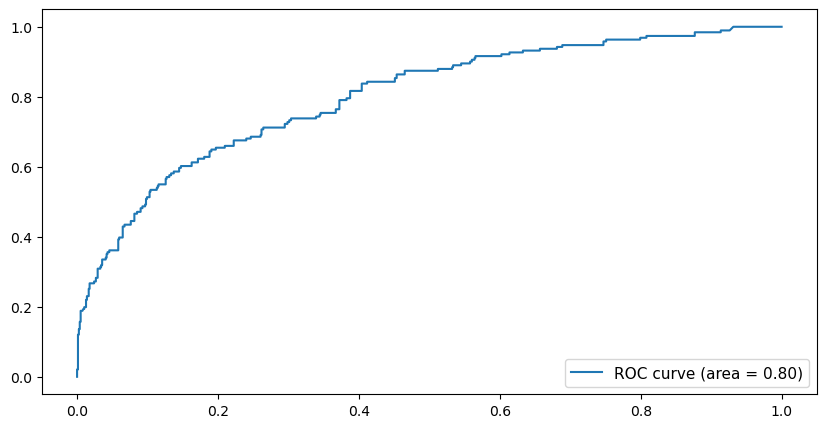

In [53]:
# plotting roc_curve
import matplotlib.pyplot as plt

auc_score = roc_auc_score(y_test,y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(10,5))

plt.plot(fpr,tpr,label=f'ROC curve (area = {auc_score:.2f})')
plt.legend(loc="lower right", fontsize=11)

In [64]:
# Hyperparam tunning
import warnings;warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

params = {
    'AdaB-Class__n_estimators': [50, 100, 200, 300, 400, 500],
    'AdaB-Class__algorithm': ['SAMME'],
    'AdaB-Class__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 1.5]
}

randomcv = RandomizedSearchCV(model_pipeline,param_distributions=params,cv=3,n_iter=20)

randomcv.fit(X_train,y_train)

randomcv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object'))])),
                ('AdaB-Reg',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=500))])

accuracy_score: 0.8384458077709611
confusion_matrix: [[769  18]
 [140  51]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       787
           1       0.74      0.27      0.39       191

    accuracy                           0.84       978
   macro avg       0.79      0.62      0.65       978
weighted avg       0.83      0.84      0.81       978



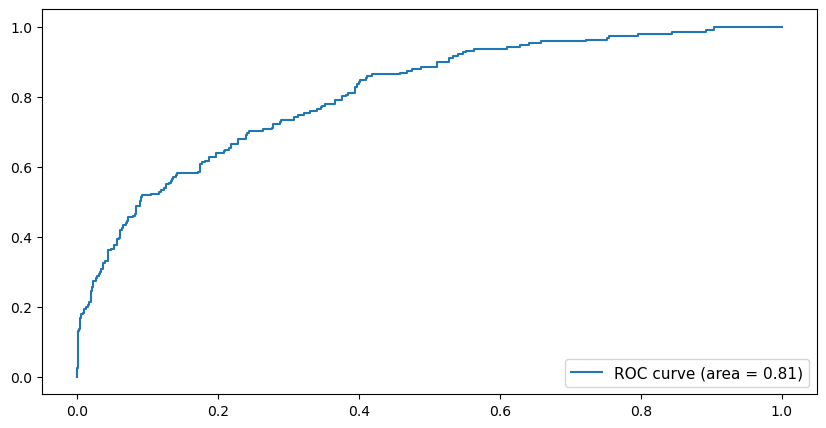

In [66]:
model = randomcv.best_estimator_

y_pred_ = model.predict(X_test)
y_proba_ = model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_)
cm = confusion_matrix(y_test, y_pred_)
report = classification_report(y_test, y_pred_)

print(f"accuracy_score: {accuracy}")
print(f"confusion_matrix: {cm}")
print(f"classification_report:\n {report}")

auc_score = roc_auc_score(y_test,y_proba_)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_)

plt.figure(figsize=(10,5))

plt.plot(fpr,tpr,label=f'ROC curve (area = {auc_score:.2f})')
plt.legend(loc="lower right", fontsize=11)